In [93]:
# Import needed libraries

# Python Imaging Library for images
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

# For HTTP Requests
import requests

Retrieving a random image as album cover

In [94]:
# Writing a function to display random image and text positioning

def display_cover(top,bottom ):
    
    # Get random image from free service https://picsum.photos/
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    name='album_art_raw.png'
    # Save the image as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Opens the image
    img = Image.open("album_art_raw.png")
    # Enables putting text on image
    draw = ImageDraw.Draw(img)

    # Use font from PIL library
    # run "% ls /usr/share/fonts/truetype/dejavu" to see what other fonts are available
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) #20pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) # 25pt font

    # The x,y coordinates for where our album name and band name text will start
    # Counted from the top left of the picture (in pixels)
    band_x, band_y = 10, 10
    album_x, album_y = 10, 400

    # Use white text with a black border to make text readable using PIL technique
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

Creating a random band title from a wikipedia page

In [95]:
# Generate random wiki page
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

# Convert the wiki page to an object, containing XML data
raw_random_wikipedia_page = requests.get(url = wikipedia_link)

# Convert this object to a string
page = raw_random_wikipedia_page.text

# Retrieving the title from the string
xml_e = page.find('</title>')
xml_b = page.find('<title>')
title_b_len = len('</title>')
total_len = xml_e + title_b_len
title = page[xml_b:total_len]

#Creating the bandtitle, stripping the XML elements and '-Wikipedia'
band_title = (title.strip('</title> - Wikipedia'))

In [96]:
# Generate random wiki page
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

# Convert the wiki page to an object, containing XML data
raw_random_wikipedia_page = requests.get(url = wikipedia_link)

# Convert this object to a string
page = raw_random_wikipedia_page.text

# Retrieving the title from the string
xml_e = page.find('</title>')
xml_b = page.find('<title>')
title_b_len = len('</title>')
total_len = xml_e + title_b_len
title = page[xml_b:total_len]

#Creating the albumtitle, stripping the XML elements and '-Wikipedia'
album_title = (title.strip('</title> - Wikipedia'))

Displaying the final album cover

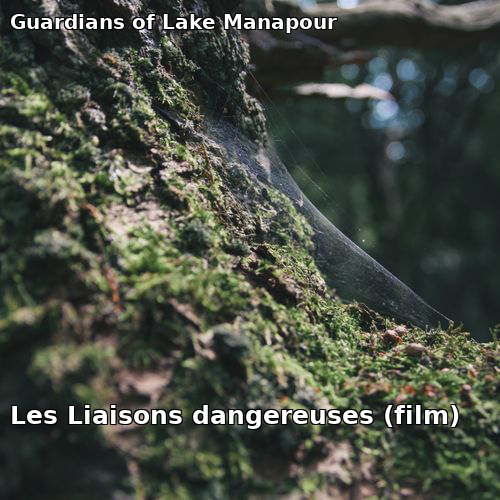

In [97]:
# Using the display_cover function
img=display_cover(top=band_title,bottom=album_title)
# Saving the image
img.save('sample-out.png')
# Using the IPythonImage to disply the picture
IPythonImage(filename='sample-out.png')